# Decentmon data preparation

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

from decmon.constants import *
from decmon.df_utils import *
from decmon.filter import *
from decmon.plotter import *

In [2]:
SUBDIR = "7"

In [3]:
path = f"{INPUT_DIR}/{SUBDIR}"

f_df = [load_simulation_data(f"{path}/{i}_output.log") for i in range(1, 9)]
f_df[1].head()

,formula_id,x,cent_trace_len,decent_trace_len,odecent_trace_len,cent_num_mess,decent_num_mess,odecent_num_mess,cent_size_mess,decent_size_mess,odecent_size_mess,cent_nb_progressions,decent_nb_progressions,odecent_nb_progressions,formula,trace
0,0,1,7,8,7,42,6,0,1.0,0.61,0.0,14,52,14,"Glob (Var ""e"")",{a| |c|d|e| | } ; {a| | |d|e|f|g} ; { | | |d|...
1,1,1,2,3,2,7,0,0,1.0,0.00,0.0,3,7,3,"Next (Var ""f"")",{a|b| |d|e| | } ; { |b| |d|e|f| } ; {a| |c|d|...
2,2,1,2,3,2,7,0,0,1.0,0.00,0.0,3,7,3,"Next (Var ""g"")",{a| |c| |e| | } ; {a|b|c|d|e|f|g} ; {a| |c| |...
3,3,1,2,3,2,7,0,0,1.0,0.00,0.0,3,7,3,"Next (Var ""a"")",{a|b| |d| |f|g} ; { | | |d| | | } ; {a|b|c|d|...
4,4,1,2,3,2,7,0,0,1.0,0.00,0.0,3,7,3,"Next (Var ""a"")",{a|b| | | |f|g} ; { | | |d|e|f|g} ; { |b| |d|...


In [4]:
patterns = range(len(f_df))

In [5]:
strategies_f_df = [split_by_dictionary(f_df[i], STRATEGIES) for i in patterns]

print(f"Datasets: {len(strategies_f_df)}. Strategies: {len(strategies_f_df[0])}. Single dataset Formulae:{len(strategies_f_df[0][0])}")
sep_strat_f_df = [pd.concat(strategies_f_df[i], ignore_index=True) for i in patterns]
sep_strat_f_df[0].head()

Datasets: 8. Strategies: 3. Single dataset Formulae:5360


,formula_id,x,trace_len,num_mess,size_mess,nb_progressions,formula,trace,strategy
0,0,1,2,7,1.0,4,"Glob (Var ""f"")",{ |b|c|d| |f| } ; {a| | |d|e| |g} ; { | | |d|...,orchestration
1,1,1,2,7,1.0,4,"Glob (Var ""f"")",{a|b|c| | |f| } ; {a| | | |e| |g} ; {a|b|c|d|...,orchestration
2,2,1,2,7,1.0,4,"Ev (Var ""e"")",{ |b| | | |f|g} ; {a| |c| |e|f|g} ; { |b|c| |...,orchestration
3,3,1,2,7,1.0,4,"Glob (Var ""a"")",{a|b| | | | |g} ; { | | | |e|f| } ; { |b|c|d|...,orchestration
4,4,1,3,14,1.0,12,"Until (Var ""c"", Var ""d"")",{a|b|c| | |f|g} ; { | |c| |e|f| } ; {a|b| |d|...,orchestration


In [6]:
merged_metrics_df = [extract_metrics(sep_strat_f_df[i]) for i in patterns]

merged_metrics_df[0].head()

,formula_id,strategy,value,metric
0,0,orchestration,2.0,trace_len
1,1,orchestration,2.0,trace_len
2,2,orchestration,2.0,trace_len
3,3,orchestration,2.0,trace_len
4,4,orchestration,3.0,trace_len


In [7]:
df_f_ops = [extract_ops(sep_strat_f_df[i]) for i in patterns]
df_f_ops[0].head()

,0,1,2,3,4,5,6,7,8,9,...,297,298,299,300,301,302,303,304,305,306
0,13,-6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13,-6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12,-5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13,-1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,-3,-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plotting

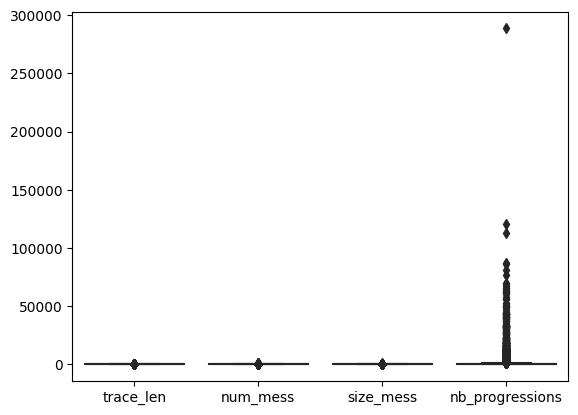

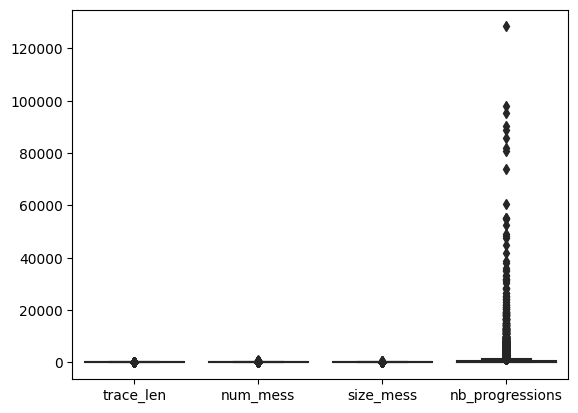

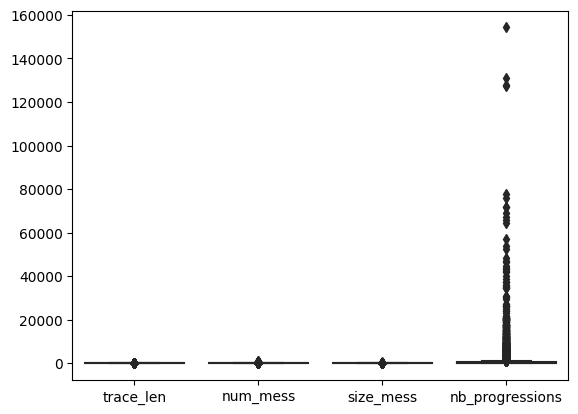

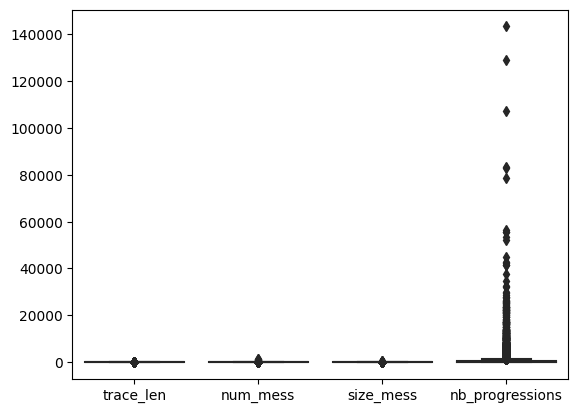

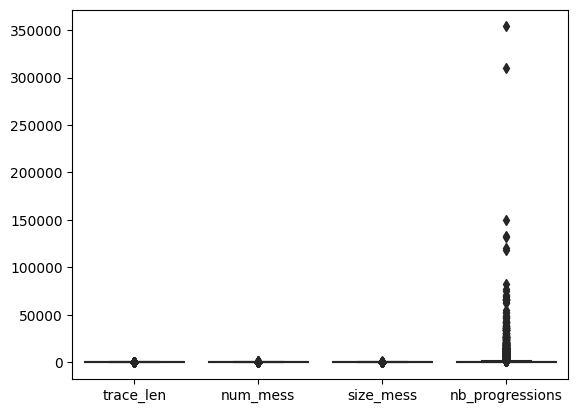

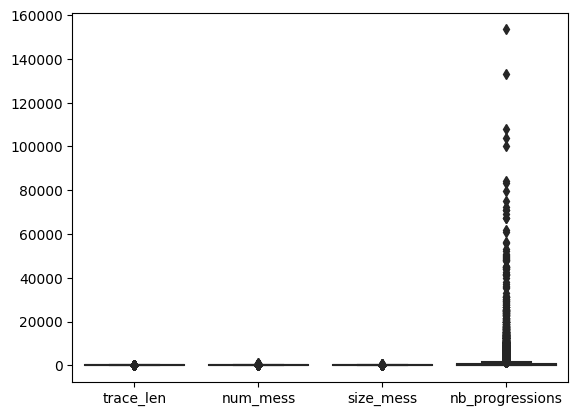

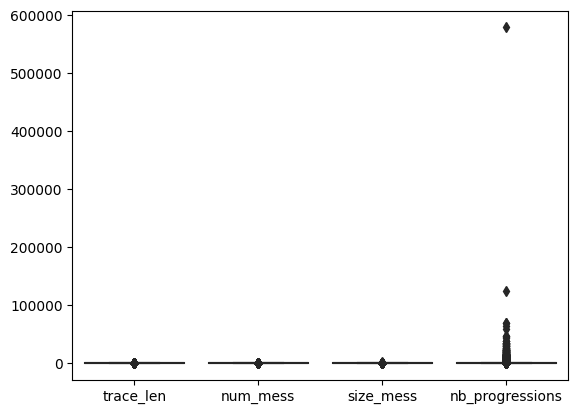

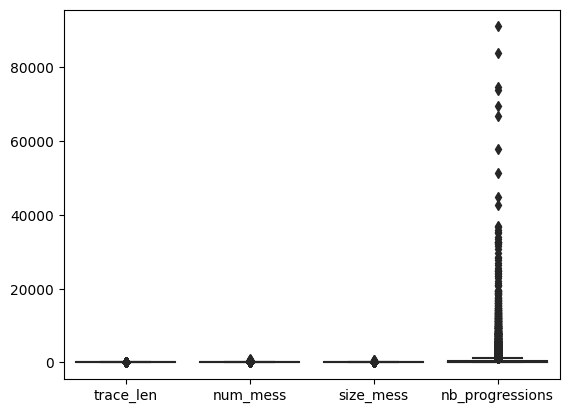

In [8]:
to_drop = ['formula_id', 'x']

for i in patterns:
    cleaned_up_data = sep_strat_f_df[i].drop(to_drop, axis=1)
    plot = plot_boxplot(cleaned_up_data)
    plt.show()

In [9]:
# from matplotlib import pyplot as plt
#
# COLS = 3
# ROWS = 4
#
# fig, axs = plt.subplots(ncols=COLS, nrows=ROWS, figsize=(14,5))
#
# to_drop = ['formula_id', 'x']
#
# for i in patterns:
#     col = i % COLS
#     row = i % ROWS
#
#     cleaned_up_data = sep_strat_f_df[i].drop(to_drop, axis=1)
#     plot = plot_boxplot(cleaned_up_data, ax=axs[col][row])
#
# fig

In [10]:
def add_column(df: pd.DataFrame, column: str, value: any) -> pd.DataFrame:
    df[column] = value
    return df

merged_metrics_dfp = [merged_metrics_df[i].copy() for i in patterns]
# merged_metrics_dfp = [add_column(merged_metrics_dfp[i].groupby(['strategy', 'metric']).mean(), 'pattern', i) for i in patterns]
merged_metrics_dfp = [add_column(merged_metrics_dfp[i], 'pattern', i) for i in patterns]
[merged_metrics_dfp[i].drop(['formula_id'], axis=1, inplace=True) for i in patterns]
merged_metrics_dfp = [pd.DataFrame(merged_metrics_dfp[i]).reset_index() for i in patterns]
merged_metrics_dfp[0]

,index,strategy,value,metric,pattern
0,0,orchestration,2.0,trace_len,0
1,1,orchestration,2.0,trace_len,0
2,2,orchestration,2.0,trace_len,0
3,3,orchestration,2.0,trace_len,0
4,4,orchestration,3.0,trace_len,0
...,...,...,...,...,...
64315,16075,choreography,427.0,nb_progressions,0
64316,16076,choreography,864.0,nb_progressions,0
64317,16077,choreography,975.0,nb_progressions,0
64318,16078,choreography,15485.0,nb_progressions,0


In [11]:
# for i in patterns:
#     grid_plot = plot_grid_barplots(merged_metrics_df[i], grid_cell_field= 'metric',
#               y_axis = 'value', x_axis = 'strategy',
#               order = ['orchestration', 'migration', 'choreography'])


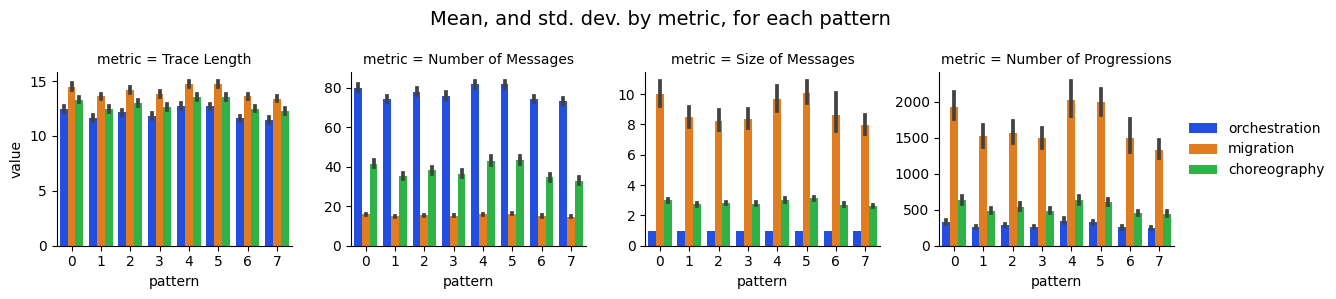

In [12]:
plot_metrics_by_patterns(merged_metrics_dfp)

In [13]:
merged_metrics_dfp[1]

,index,strategy,value,metric,pattern
0,0,orchestration,7.0,trace_len,1
1,1,orchestration,2.0,trace_len,1
2,2,orchestration,2.0,trace_len,1
3,3,orchestration,2.0,trace_len,1
4,4,orchestration,2.0,trace_len,1
...,...,...,...,...,...
61339,15331,choreography,872.0,nb_progressions,1
61340,15332,choreography,8532.0,nb_progressions,1
61341,15333,choreography,3182.0,nb_progressions,1
61342,15334,choreography,414.0,nb_progressions,1


In [14]:
# ndf = merged_metrics.copy()
# ndf['strategy'] = ndf['strategy'].str.replace("^cent_", "1", regex=True)
# ndf['strategy'] = ndf['strategy'].str.replace("^decent_", "2", regex=True)
# ndf['strategy'] = ndf['strategy'].str.replace("^odecent_", "3", regex=True)
# ndf

In [15]:
expanded_f_df = [sep_strat_f_df[i].merge(df_f_ops[i], left_index=True, right_index=True) for i in patterns]
expanded_f_df[0]

,formula_id,x,trace_len,num_mess,size_mess,nb_progressions,formula,trace,strategy,0,...,297,298,299,300,301,302,303,304,305,306
0,0,1,2,7,1.00,4,"Glob (Var ""f"")",{ |b|c|d| |f| } ; {a| | |d|e| |g} ; { | | |d|...,orchestration,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2,7,1.00,4,"Glob (Var ""f"")",{a|b|c| | |f| } ; {a| | | |e| |g} ; {a|b|c|d|...,orchestration,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,2,7,1.00,4,"Ev (Var ""e"")",{ |b| | | |f|g} ; {a| |c| |e|f|g} ; { |b|c| |...,orchestration,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,2,7,1.00,4,"Glob (Var ""a"")",{a|b| | | | |g} ; { | | | |e|f| } ; { |b|c|d|...,orchestration,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,3,14,1.00,12,"Until (Var ""c"", Var ""d"")",{a|b|c| | |f|g} ; { | |c| |e|f| } ; {a|b| |d|...,orchestration,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16075,5355,6,21,67,4.68,427,"And (Or (Neg (Var ""f""), And (Or (Or (Ev (Var ...",{a| |c|d| | |g} ; {a|b| | |e| |g} ; { |b|c|d|...,choreography,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16076,5356,6,23,153,10.28,864,"Next (Ev (And (Or (And (Or (Var ""e"", Var ""d"")...",{a|b|c| |e|f|g} ; { |b| |d|e| |g} ; { |b| | |...,choreography,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16077,5357,6,36,104,4.67,975,"Ev (Neg (Until (Until (Var ""f"", Var ""g""), Unt...",{a| |c|d|e| | } ; { |b| |d| |f| } ; { |b|c|d|...,choreography,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16078,5358,6,18,33,2.73,15485,"Ev (Until (Next (Ev (Glob (Var ""d""))), And (E...",{a|b| | |e| | } ; { |b|c|d| | | } ; {a| | |d|...,choreography,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
for i in patterns:
    expanded_f_df[i].strategy = pd.Categorical(expanded_f_df[i].strategy)
    expanded_f_df[i]['strategy_id'] = expanded_f_df[i].strategy.cat.codes

full_scale_df = pd.concat(expanded_f_df)
full_scale_df

,formula_id,x,trace_len,num_mess,size_mess,nb_progressions,formula,trace,strategy,0,...,331,332,333,334,335,336,337,338,339,340
0,0,1,2,7,1.00,4,"Glob (Var ""f"")",{ |b|c|d| |f| } ; {a| | |d|e| |g} ; { | | |d|...,orchestration,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2,7,1.00,4,"Glob (Var ""f"")",{a|b|c| | |f| } ; {a| | | |e| |g} ; {a|b|c|d|...,orchestration,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,2,7,1.00,4,"Ev (Var ""e"")",{ |b| | | |f|g} ; {a| |c| |e|f|g} ; { |b|c| |...,orchestration,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,2,7,1.00,4,"Glob (Var ""a"")",{a|b| | | | |g} ; { | | | |e|f| } ; { |b|c|d|...,orchestration,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,3,14,1.00,12,"Until (Var ""c"", Var ""d"")",{a|b|c| | |f|g} ; { | |c| |e|f| } ; {a|b| |d|...,orchestration,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15205,5065,6,20,56,4.24,1842,"Glob (Or (Next (Next (Neg (Until (Var ""d"", Va...",{ |b|c|d|e|f|g} ; {a|b| |d|e|f| } ; {a| |c| |...,choreography,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15206,5066,6,21,100,7.28,562,"Ev (And (And (Or (Until (Var ""c"", Var ""e""), O...",{ | | | | |f| } ; {a|b|c|d|e|f| } ; {a| | | |...,choreography,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15207,5067,6,25,164,10.21,5756,Ev (And (Neg (Until (Until (And (Or (Neg (Var...,{a|b|c|d|e| |g} ; {a| |c| | |f|g} ; { |b|c|d|...,choreography,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15208,5068,6,19,174,13.74,2227,"Glob (Or (Until (And (Or (Neg (Var ""c""), Or (...",{a| | | |e|f| } ; {a|b|c| |e|f| } ; {a|b|c| |...,choreography,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# TODO:
# -- pycaret for classification
# Action points
# - higher number of nodes (5, 7, 9?)
# - statistics about the learning
# - test other algorithms (pycaret)